In [11]:
import numpy as np
import pandas as pd
import torch

import plotly.graph_objects as go

rng = np.random.default_rng()

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [13]:
import sys
sys.path.append('../') # now can access entire repository, (important when running locally)

In [14]:
#from orbit_datasets import neworbits, versatileorbits, staticorbits
from ldcl.data.physics import get_dataset

In [21]:
#train_orbits_dataset = versatileorbits.OrbitsDataset()
train_orbits_dataset = get_dataset("../data_configs/phi0_vary.json", "../../saved_datasets")[0]

In [22]:
"""
Dims = (10240, 100, 4) = (numOrbits, numSamples, (posx,posy,momentumx,momentumy))
"""
train_orbits_dataset.data.shape

(10240, 10, 4)

In [23]:
num = 100
fig = go.Figure(
    data=[go.Scatter3d(
    x=train_orbits_dataset.data[:num,:,0].flatten(),
    y=train_orbits_dataset.data[:num,:,1].flatten(),
    z=np.abs(rng.standard_normal(np.shape(train_orbits_dataset.data)[1] * num)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        line=dict(width=0)
    )#,
    #text=labels
)],
layout=go.Layout(height=800, width=1000))
fig.show()

[(-2.0, 4.0), (-2.0, 2.0)]

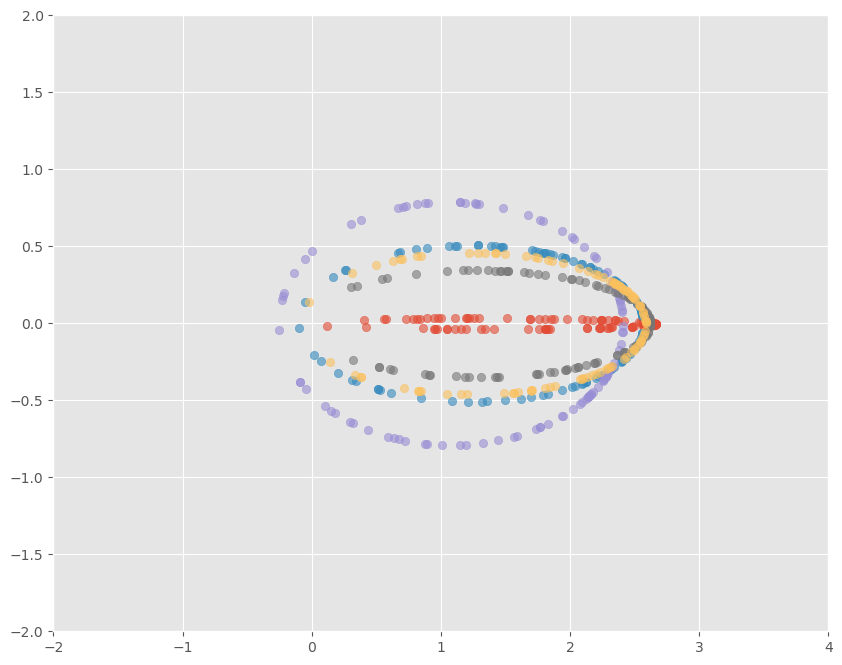

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
for orbit_i in range(5):
    ax.scatter(train_orbits_dataset.data[orbit_i,:,0], train_orbits_dataset.data[orbit_i,:,1], alpha=.6) # position
    #ax.scatter(train_orbits_dataset.data[orbit_i,:,2], train_orbits_dataset.data[orbit_i,:,3], alpha=.3) # momentum

fig.set_size_inches(10, 8, forward=True)
ax.set(xlim=(-2, 4), ylim=(-2, 2))